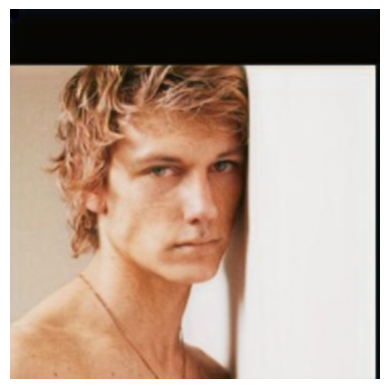

<Figure size 640x480 with 0 Axes>

In [4]:
import os
import random
import matplotlib.pyplot as plt
import torch
from PIL import Image

from torchvision import transforms
from gan_module import Generator


model = Generator(ngf=32, n_residual_blocks=9)
ckpt = torch.load('pretrained_model/state_dict.pth', map_location='cpu')
model.load_state_dict(ckpt)
model.eval()

trans = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])


img = Image.open(r"C:\Users\Devika\Downloads\faceaging\samples\14_Alex_Pettyfer_0005.jpg").convert('RGB')
img = trans(img).unsqueeze(0)
aged_face = model(img)
aged_face = (aged_face.squeeze().permute(1, 2, 0).detach().numpy() + 1.0) / 2.0

import matplotlib.pyplot as plt

plt.imshow(aged_face)
plt.axis('off')  # Turn off axis
plt.show()
plt.savefig("mygraph.png")

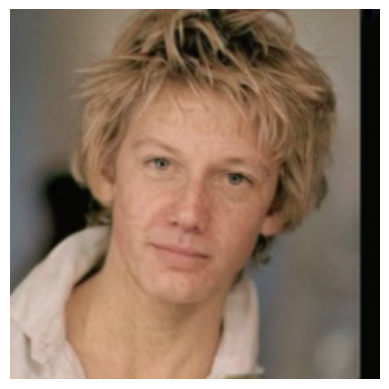

In [2]:
import matplotlib.pyplot as plt
# Assuming aged_face is your image data
plt.imshow(aged_face)
plt.axis('off')  # Turn off axis
plt.show()